## Day 30 — Logistic Regression: Intuition, Mathematics & Optimization

This notebook is part of my **Machine Learning Learning Journey** and introduces
**Logistic Regression** from first principles.

The focus of this session is on:
- Why Linear Regression fails for classification
- Probability modeling using sigmoid
- Log-odds and logit transformation
- Maximum Likelihood Estimation (MLE)
- Loss function used in Logistic Regression

This day builds a **strong mathematical and intuitive foundation** for
binary classification models.

---


## 1. Why Linear Regression Fails for Classification

Linear Regression:
\[
y = w_1x_1 + w_2x_2 + \dots + w_nx_n + w_0
\]

Problems when used for classification:
- Output is **unbounded** (\(-\infty, +\infty\))
- Cannot represent probabilities
- Thresholding leads to unstable decisions
- Squared error loss is not suitable

Hence, a **probability-based model** is required.


## 2. Binary Classification Setup

- Target variable:
\[
y \in \{0, 1\}
\]

- Goal:
\[
P(y = 1 \mid X)
\]

- Output should satisfy:
\[
0 \leq p \leq 1
\]

This motivates Logistic Regression.


## 3. Linear Probability Model (LPM)

Assume:
\[
p = w^Tx
\]

Issues:
- \(p < 0\) or \(p > 1\)
- Violates probability rules
- Not useful for classification

Hence, transformation is required.


## 4. Log-Odds (Logit Function)

Odds:
\[
\text{odds} = \frac{p}{1-p}
\]

Log-odds:
\[
\log\left(\frac{p}{1-p}\right) = w^Tx
\]

This transforms probability into an **unbounded space**.


## 5. Sigmoid (Logistic) Function

Solving for \(p\):

\[
p = \frac{1}{1 + e^{-w^Tx}}
\]

Properties:
- Output in (0, 1)
- Smooth and differentiable
- Interpretable as probability


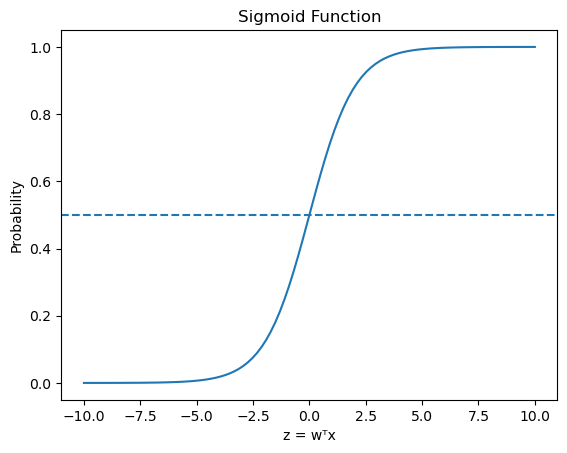

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.axhline(0.5, linestyle='--')
plt.xlabel("z = wᵀx")
plt.ylabel("Probability")
plt.title("Sigmoid Function")
plt.show()


## 6. Decision Boundary

Prediction rule:
- If \(p \ge 0.5\) → Class 1
- If \(p < 0.5\) → Class 0

Decision boundary:
\[
w^Tx = 0
\]


## 7. Why OLS Is Not Used in Logistic Regression

OLS minimizes:
\[
(y - \hat{y})^2
\]

Problems:
- Non-convex for classification
- Poor probabilistic interpretation
- Sensitive to outliers

Instead, **Maximum Likelihood Estimation (MLE)** is used.


## 8. Likelihood Function

For a single data point:
- If \(y = 1\): probability = \(p\)
- If \(y = 0\): probability = \(1 - p\)

Combined:
\[
P(y|x) = p^y (1-p)^{1-y}
\]


## 9. Log-Likelihood

Likelihood for dataset:
\[
\prod_{i=1}^{m} p_i^{y_i}(1-p_i)^{1-y_i}
\]

Taking log:
\[
\sum_{i=1}^{m} \left[ y_i \log(p_i) + (1-y_i)\log(1-p_i) \right]
\]

Goal:
- **Maximize log-likelihood**


## 10. Negative Log Likelihood (Log Loss)

Minimize:
\[
\text{NLL} = -\sum_{i=1}^{m} \left[ y_i \log(p_i) + (1-y_i)\log(1-p_i) \right]
\]

Also called:
- Binary Cross Entropy (BCE)
- Log Loss


## 11. Loss Function Comparison

| Model | Loss Function |
|------|--------------|
| Linear Regression | Squared Error / MSE |
| Logistic Regression | Log Loss (NLL / BCE) |

Squared loss ❌ for classification  
Log loss ✅ for probability models


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_prob))

Accuracy: 0.956140350877193
Log Loss: 0.07414694253988832


C:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 12. Assumptions of Logistic Regression

1. Binary target variable  
2. Independent observations  
3. Linear relationship between features and log-odds  
4. No multicollinearity  
5. No influential outliers  
6. Large sample size preferred  


## Summary

- Logistic Regression models probability, not labels
- Uses sigmoid to map linear output to probability
- Learns parameters using Maximum Likelihood Estimation
- Optimizes Log Loss instead of Squared Error
- Forms the foundation for:
  - Classification metrics
  - Threshold tuning
  - Imbalanced learning